# 3 Activation Functions and Vanishing Gradient

The purpose of this task is to get familiar with different activation functions commonly used in artificial neural networks, as well as with some particular problems associated with some of the functions. We will mostly use the common libraries that you have learned to work with in previous assignments for this task.

In [6]:
# Basic import packages. You can add other packages as needed.
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

## 3.1 Activation Functions
Your first task will be to give a brief overview of the most popular activation functions used in machine learning, both in terms of mathematical definition and plotting. 

_As usual, for all plots you will produce, keep in mind to add title, proper axis ticks, and axis labels to the plots and make sure they're readable and comprehensible. Whenever you have to plot two different lines, please use different colors for them and add a legend to the plot._

### 3.1.1 Logistic function
The logistic function is one particular Sigmoid activation function. Given some neuron input $x$, it is defined by the formula $$f(x) = \frac{1}{1+e^{-x}}$$

1.) Implement a python function that calculates the logistic function, then

2.) implement the derivative of the logistic function (either you look it up online or you try to derive the equation yourself), and finally

3.) write a function that plots both the logistic function $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_logistic(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [7]:
def logistic(x):
    return 1/(1 + math.exp(-x))

In [8]:
def logistic_grad(x):
    l = logistic(x)
    return l * (1-l)

In [13]:
def plot_logistic(x_min, x_max):
    values = np.arange(x_min, x_max, 0.01)
    plt.plot(values, [logistic(value) for value in values] )
    plt.plot(values, [logistic_grad(value) for value in values] )
    plt.title("Activation Function")
    plt.xlabel("x")
    plt.ylabel("logistic(blue)\n logistic_grad(orange)")
    plt.show()

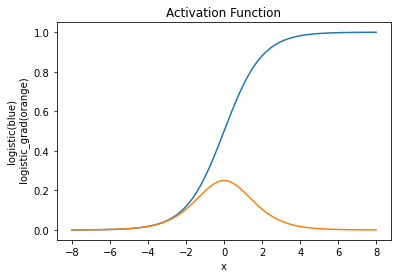

In [14]:
# Use this function call to test your code for different interval boundaries.
plot_logistic(-8, 8)

### 3.1.2 Hyperbolic tangent

The hyperbolic tangent $(tanh)$ is another type of Sigmoid activation function. Given some neuron input $x$, it is defined by the formula $$f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

1.) Implement a python function that calculates the hyperbolic tangent, then

2.) implement the derivative of the hyperbolic tangent (either you look it up online or you try to derive the equation yourself), and finally

3.) write a function that plots both the hyperbolic tangent $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_tanh(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [2]:
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [3]:
def tanh_grad(x):
    return 1 - math.pow(tanh(x), 2)

In [17]:
def plot_tanh(x_min, x_max):
    values = np.arange(x_min, x_max, 0.01)
    plt.plot(values, [tanh(value) for value in values] )
    plt.plot(values, [tanh_grad(value) for value in values] )
    plt.title("Activation Function")
    plt.xlabel("x")
    plt.ylabel("tanh(blue)\n tanh_grad(orange)")
    plt.show()

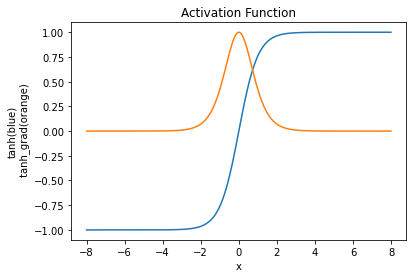

In [18]:
# Use this function call to test your code for different interval boundaries.
plot_tanh(-8, 8)

### 3.1.3 Rectified Linear Unit
The Rectified Linear Unit (ReLU) is another well-known actiavtion function used in neural networks. Given some neuron input $x$, it is defined by the formula 

$$f(x) = \begin{cases}
      x, & \text{if} \; x>0 \\
      0, & \text{otherwise}
    \end{cases}$$

1.) Implement a python function that calculates the ReLU function, then

2.) implement the derivative of the ReLU function (either you look it up online or you try to derive the equation yourself), and finally

3.) write a function that plots both the ReLU function $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_relu(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [29]:
def relu(x):
    return x if (x > 0) else 0

In [ ]:
def relu_grad(x):
    return 0 if (x < 0) else 1

In [27]:
def plot_relu(x_min, x_max):
    values = np.arange(x_min, x_max, 0.01)
    plt.plot(values, [relu(value) for value in values] )
    plt.title("Activation Function")
    plt.xlabel("x")
    plt.ylabel("relu(x)")
    plt.show()

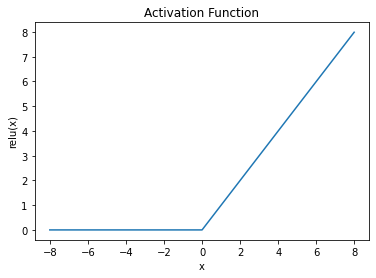

In [30]:
# Use this function call to test your code for different interval boundaries.
plot_relu(-8, 8)

## 3.2 Vanishing Gradients

Explain the problem of **vanishing gradients** in your own words by taking a look at the plots you just generated above and answering the questions below: 

- When can vanishing gradients occur?
- Assuming our input values are positive, which activation functions are prone to vanishing gradients, and why?
- Which layers in a feed-forward neural network are most affected by vanishing gradients?
- Considering the causes of vanishing gradients, what could instead cause the **exploding gradients** problem in neural networks?

**ANSWER:**

Vanishing gradients occur, when the input value lies withing regions where the transfer function doesn't change much between different values (low value in the transfer functions derivative).

Sigmoid functions and softsign functions are prone to vanishing gradients because they asymptotically converge to 1.

The first layers are most effected because of the chain rule in backpropagation. The small possible changes to the weights get smaller with every layer.

Exploding gradients could mean that functions e.g. $x^3$ grow to quickly.